In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("./HR_Analytics.csv")
df.head(5)

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,80,1,10,3,3,10,7,1,7,No
2,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,4,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,80,0,8,3,3,8,7,3,0,No
4,5,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,80,1,6,3,3,2,2,2,2,No


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [5]:
df.describe()

,ID,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.isna().sum()

ID                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [7]:
df = df.dropna()

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(1470, 35)

In [11]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [12]:
le = LabelEncoder()

In [13]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':  
        df[i] = le.fit_transform(df[i])

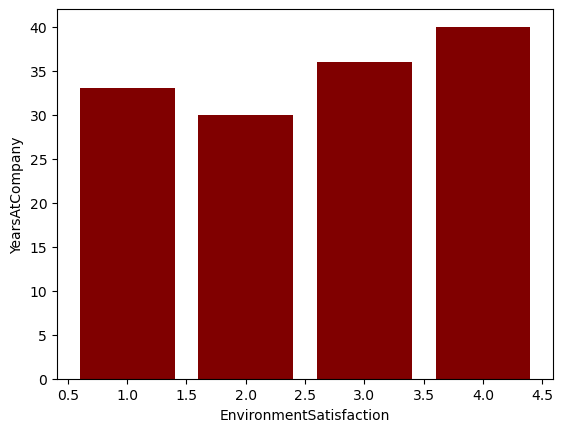

In [36]:
x=df['EnvironmentSatisfaction']
y=df['YearsAtCompany']
plt.bar(x,y,color='maroon',linewidth=1)
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('YearsAtCompany')
plt.show()

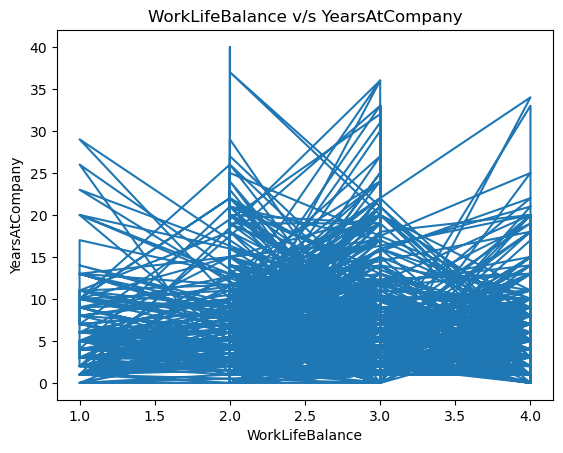

In [42]:
x=df['WorkLifeBalance']
y=df['YearsAtCompany']
plt.plot(x,y)
plt.title('WorkLifeBalance v/s YearsAtCompany')
plt.xlabel('WorkLifeBalance')
plt.ylabel('YearsAtCompany')
plt.show()

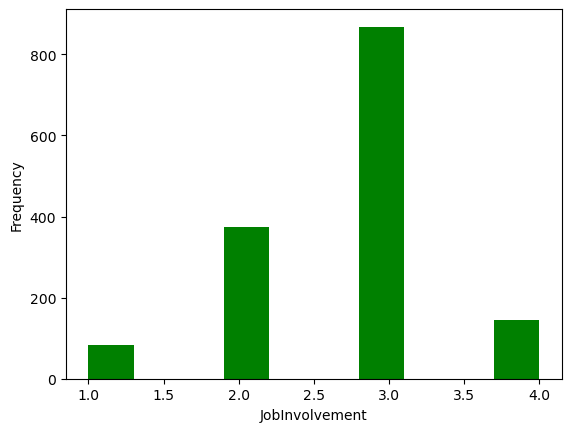

In [38]:
x=df['JobInvolvement']
plt.hist(x,color='green')
plt.xlabel('JobInvolvement')
plt.ylabel('Frequency')
plt.show()

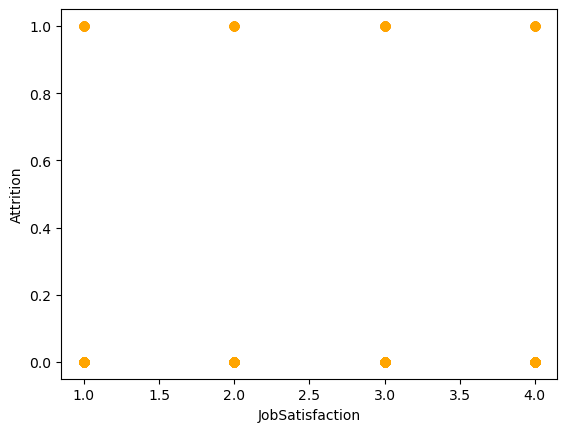

In [45]:
x=df['JobSatisfaction']
y=df['Attrition']
plt.scatter(x,y,color='orange')
plt.xlabel('JobSatisfaction')
plt.ylabel('Attrition')
plt.show()

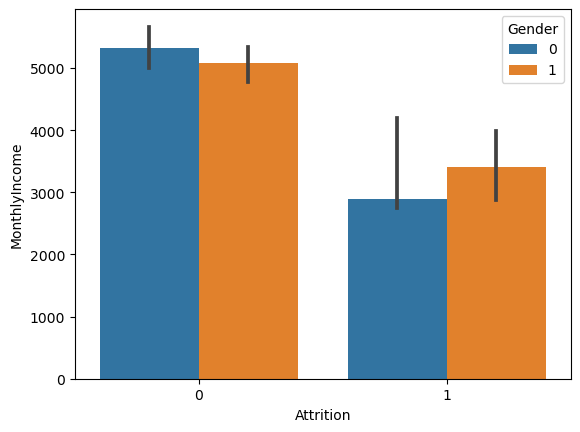

In [47]:
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=df, estimator=median)
plt.show()

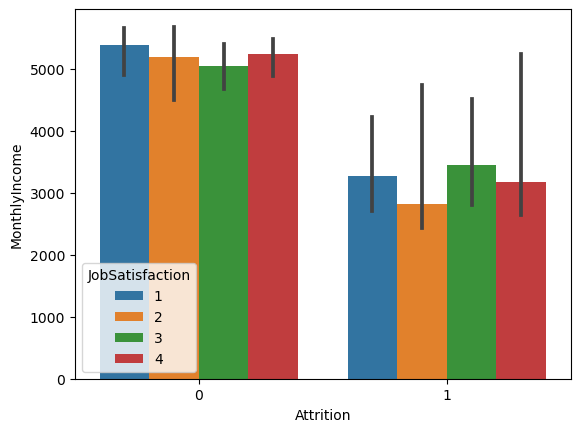

In [49]:
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'JobSatisfaction',data=df, estimator=median)
plt.show()

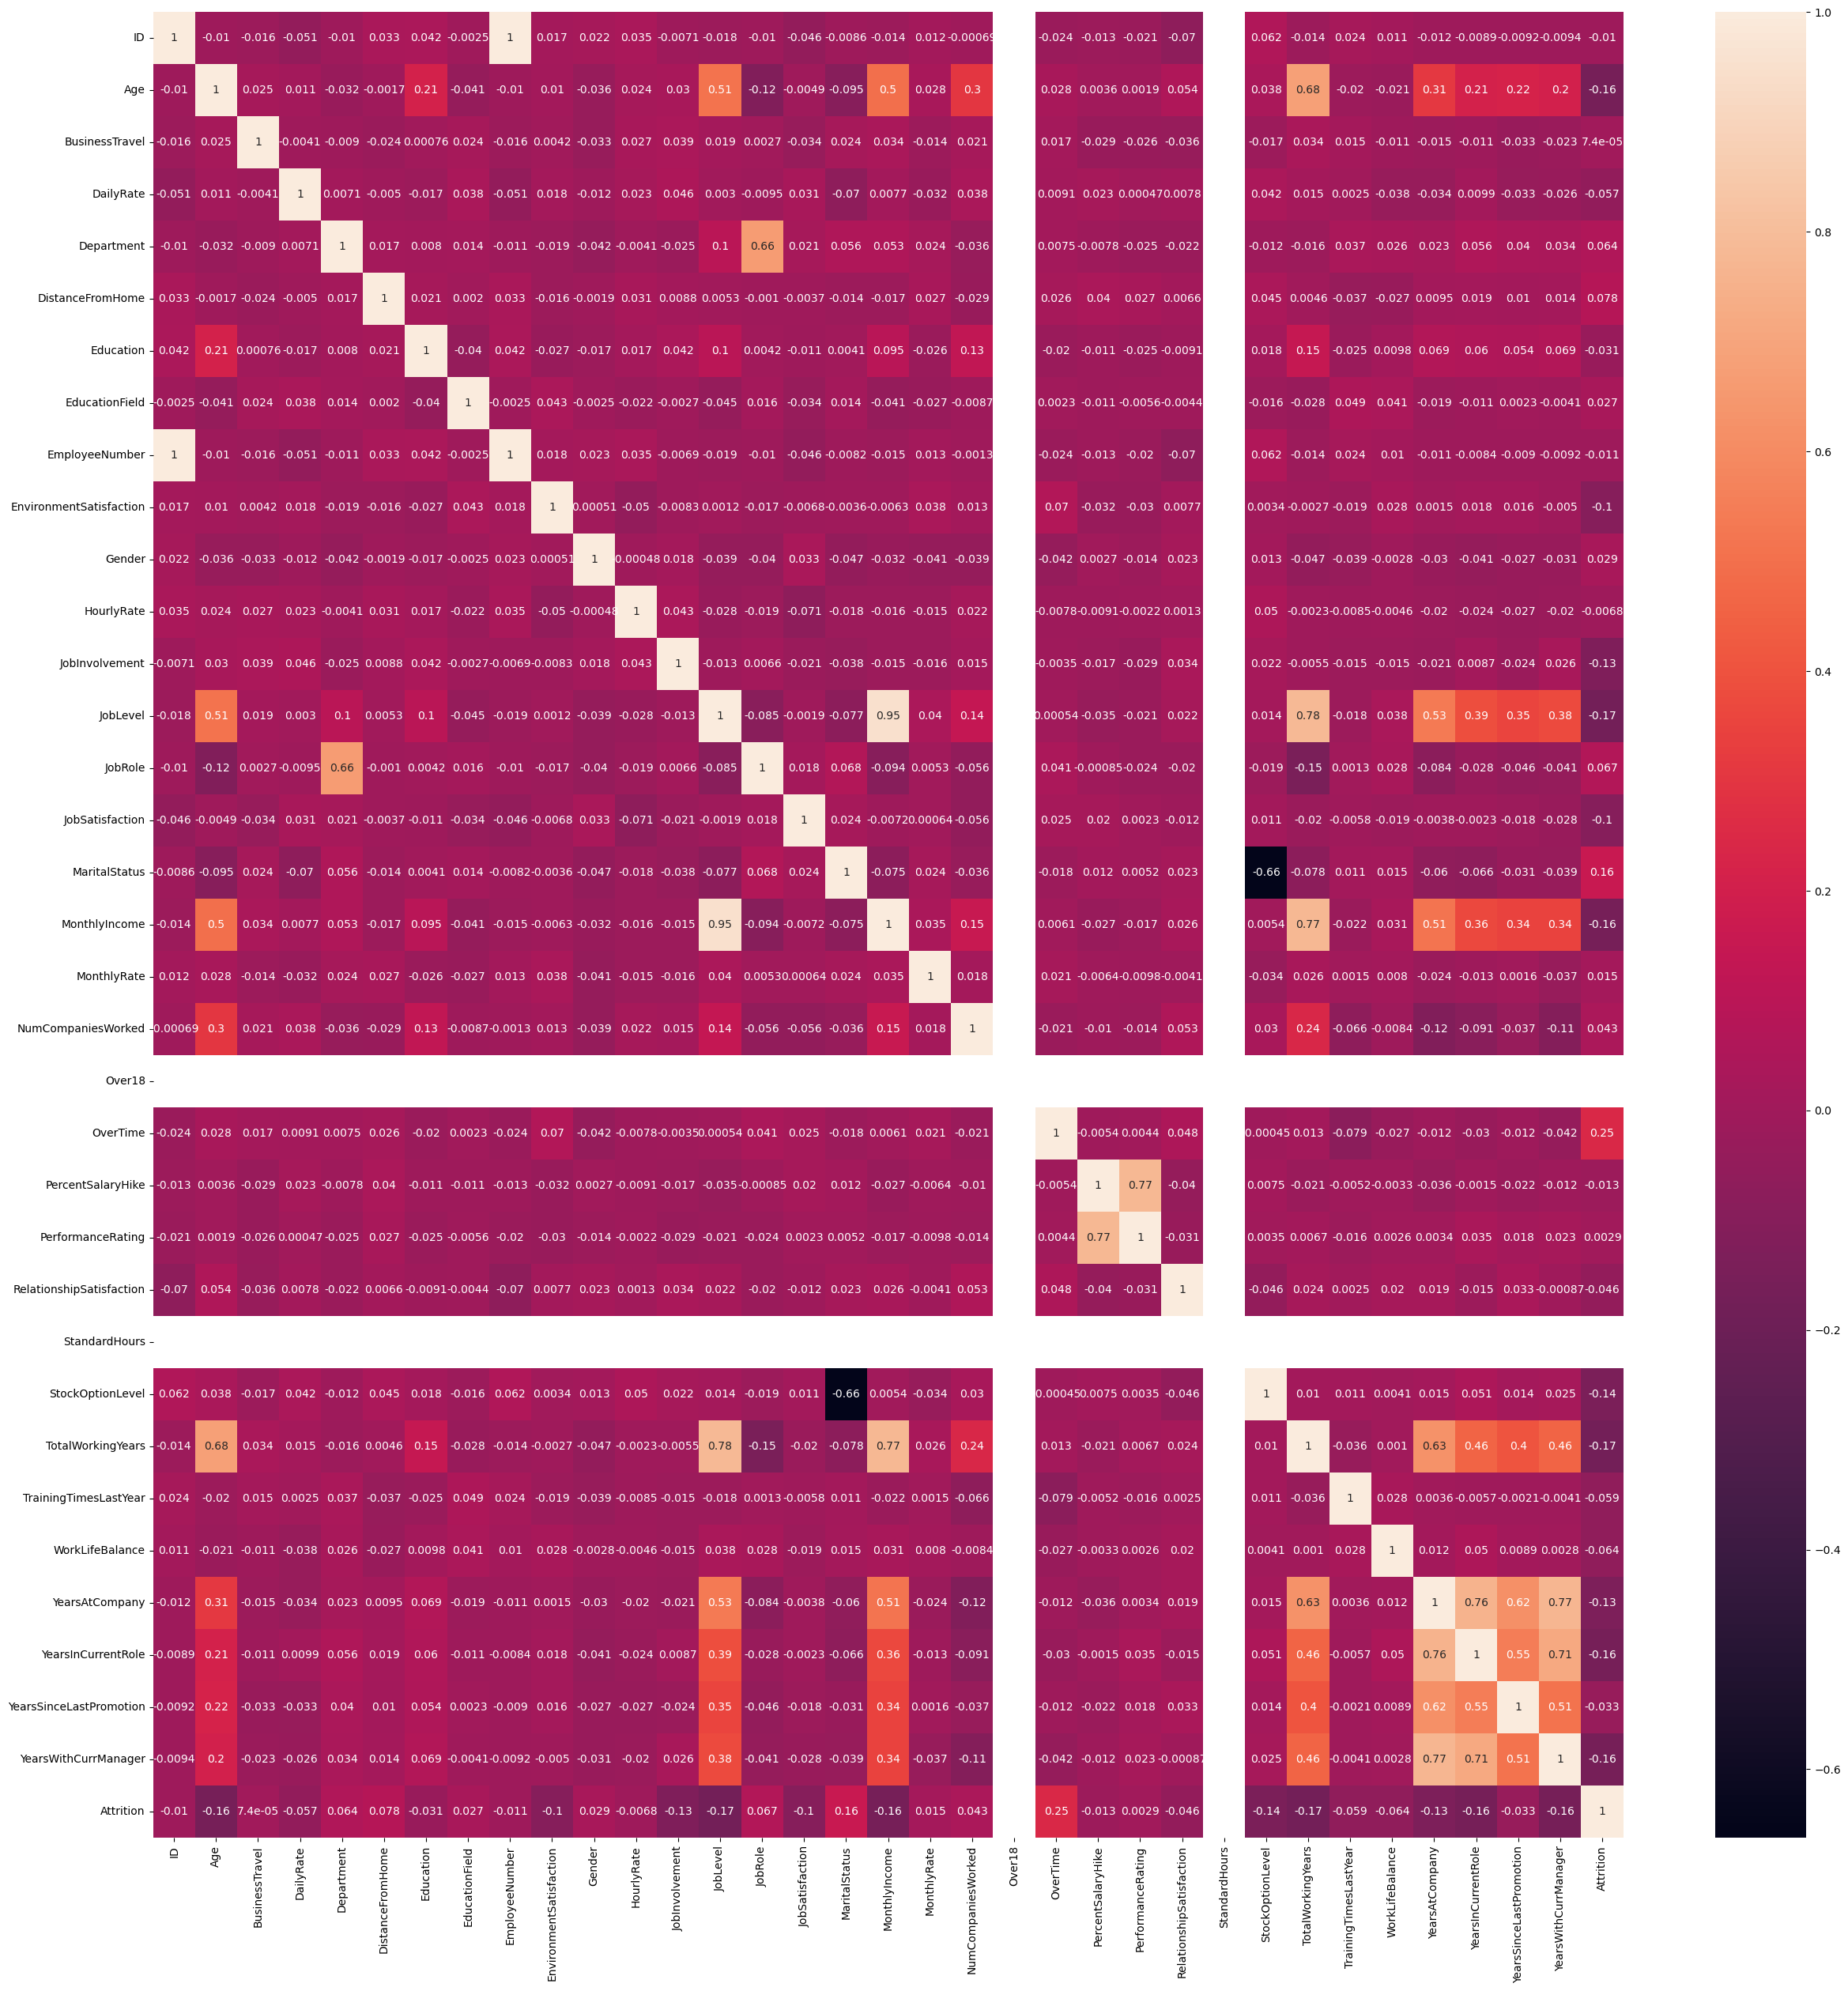

In [28]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [16]:
y.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [20]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,-0.148809,0,-0.430110,2,0.084789,1.027313,3,-0.673640,-0.564468,1,...,1.195863,0.0,-0.942376,-0.221890,0.050104,-1.102760,0.461861,-0.376347,2.045776,0.775758
1091,-0.468151,2,-0.582545,1,1.963772,0.100841,1,0.838726,1.300179,1,...,1.195863,0.0,-0.942376,-0.855244,-0.651358,0.370928,-0.337828,-0.376347,-0.700608,-0.620037
981,-0.255256,1,-0.361514,2,1.086913,1.027313,2,0.576879,1.300179,0,...,0.273071,0.0,0.316981,-0.855244,-2.054284,-1.102760,-0.497766,-0.655053,0.214853,-0.620037
785,0.276980,2,1.747167,1,1.337444,1.027313,5,0.119837,-1.496792,1,...,1.195863,0.0,0.316981,0.284794,2.154493,0.370928,0.621799,1.574592,2.656084,-0.899196
1332,-0.893940,1,-0.877252,1,1.838507,-0.825632,1,1.351312,1.300179,1,...,-0.649721,0.0,-0.942376,-1.361928,0.050104,-1.102760,-0.977580,-1.212464,-0.395454,-1.178355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,-0.148809,2,-0.628275,2,-0.792070,0.100841,3,1.598877,-1.496792,0,...,0.273071,0.0,1.576339,-0.221890,-0.651358,0.370928,0.301924,0.738475,0.214853,-0.061719
481,-0.361704,2,-1.398071,1,-1.042602,-0.825632,1,-0.583184,-0.564468,1,...,1.195863,0.0,0.316981,-0.728573,0.050104,0.370928,-0.177890,0.181064,-0.395454,-0.340878
124,-0.681046,2,-1.410773,2,-0.416274,1.027313,1,-1.354443,-0.564468,1,...,-0.649721,0.0,-0.942376,0.031452,0.050104,-1.102760,-0.017952,0.738475,1.435469,0.775758
198,0.064086,2,1.160293,1,-0.917336,1.027313,1,-1.183052,1.300179,1,...,-0.649721,0.0,-0.942376,0.284794,0.050104,0.370928,-0.977580,-1.212464,-0.700608,-1.178355


In [21]:
# Create a Linear Regression model and fit it
lr =LogisticRegression()
model = lr.fit(X_train,y_train)

In [22]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.8809523809523809

In [24]:
DT=DecisionTreeClassifier()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=accuracy_score(y_test,dt_pred)*100
(dt_acc_score)

76.53061224489795

In [25]:
RF=RandomForestClassifier()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=accuracy_score(y_test,rf_pred)*100
(rf_acc_score)

86.05442176870748